# Computer Vision color spaces

### Import statements

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [21]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
img = cv2.imread('img/blue-red-flowers.png')
img.shape
cpy = img.copy()
cpy.shape

(919, 1386, 3)

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [22]:
# Load a color image and split in is different B, G and R channels
B, G , R = cv2.split(cpy)

[Hint](# "cv2.split") 

In [19]:
# Show each channel channel on screen
print('Blue')
print(B)
print('Green')
print(G)
print('Red')
print(R)

Blue
[[ 33  31  28 ...  42  37  31]
 [ 36  33  30 ...  37  33  29]
 [ 40  36  33 ...  31  28  27]
 ...
 [156 157 154 ...   5   8  10]
 [145 146 142 ...   5   8   9]
 [134 134 131 ...   5   7   7]]
Green
[[52 49 45 ... 32 31 31]
 [54 51 47 ... 29 29 29]
 [56 53 50 ... 27 26 27]
 ...
 [63 58 52 ... 26 30 32]
 [63 58 52 ... 26 29 32]
 [61 57 53 ... 26 28 30]]
Red
[[143 148 153 ... 183 185 184]
 [141 145 150 ... 184 185 184]
 [139 143 147 ... 185 185 184]
 ...
 [ 61  60  56 ... 153 152 150]
 [ 60  58  56 ... 151 151 149]
 [ 59  57  55 ... 149 148 147]]


In [ ]:
def bgr2rgb(img):
    return img[:,:,::-1]

#### Merging the color channels

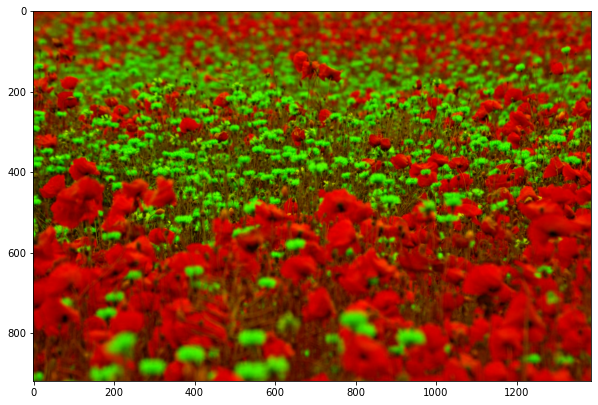

In [40]:
# Modify a channel and then merge them all again
G[:, :] = 0
cpy = cv2.merge([G, B, R])
plt.figure(figsize=(10, 8))
plt.imshow(cpy[:,:,::-1])

[Hint](# "cv2.merge") 

In [48]:
# Create a black canvas with the same size as the image you loaded
blank_img = np.zeros(cpy.shape[:2], np.uint8)
blank_img.shape

(919, 1386)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [50]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
RBB = cv2.merge([R, blank_image, blank_image])
BRB = cv2.merge([blank_image, G, blank_image])
BBB = cv2.merge([blank_image, blank_image, B])

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

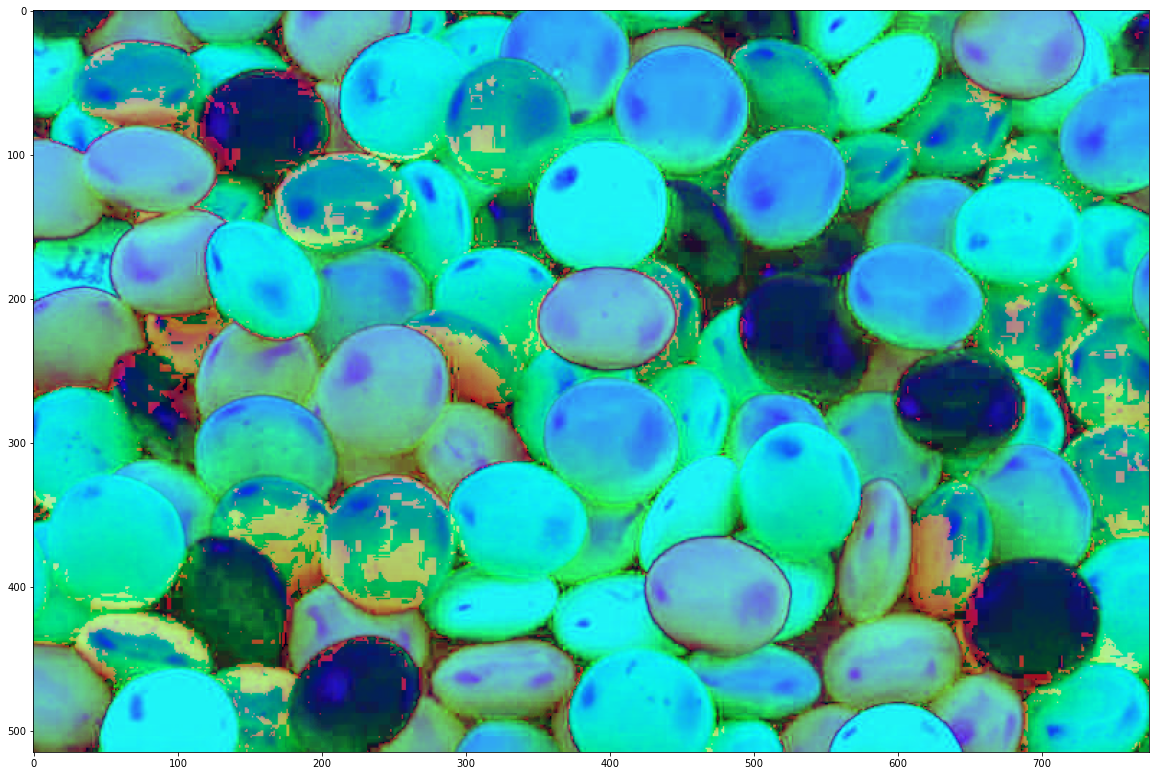

In [52]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HSV));

In [54]:
# Split the H,S and V channels 
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)
H, S, V

(array([[11, 11, 11, ..., 25, 23, 20],
        [13, 13, 11, ..., 23, 22, 19],
        [13, 13, 13, ..., 19, 17, 17],
        ...,
        [92, 95, 93, ...,  6,  6,  5],
        [95, 95, 95, ...,  6,  6,  5],
        [98, 98, 95, ...,  6,  6,  5]], dtype=uint8),
 array([[ 40,  42,  45, ..., 150, 126, 104],
        [ 47,  49,  46, ..., 133, 101,  83],
        [ 49,  50,  53, ...,  63,  48,  45],
        ...,
        [ 83,  94, 104, ..., 154, 148, 144],
        [ 75,  75,  92, ..., 154, 148, 144],
        [ 68,  67,  71, ..., 154, 148, 144]], dtype=uint8),
 array([[ 89,  86,  80, ..., 134, 111,  98],
        [ 87,  84,  78, ..., 109,  98,  95],
        [ 84,  81,  77, ...,  97, 101, 107],
        ...,
        [ 46,  49,  49, ...,  48,  50,  53],
        [ 44,  44,  47, ...,  48,  50,  53],
        [ 41,  42,  43, ...,  48,  50,  53]], dtype=uint8))

[Hint](# "cv2.cvtColor") 

In [ ]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
hsv_copy = hsv.copy()
lower_bound =(94,80,2)
upper_bound = (126, 255, 255)
mask = cv2.inRange(hsv_copy, lower_bound, upper_bound)

hsv_copy[mask==0] = [0,0,0]
cv2.imshow('HSV image', hsv_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

[Hint](# "cv2.inRange") 

In [ ]:
# Repeat the same but now with the greens
hsv_copy2 = hsv.copy()
lower_bound =(25,52,72)
upper_bound = (102, 255, 255)
mask = cv2.inRange(hsv_copy2, lower_bound, upper_bound)

hsv_copy2[mask==0] = [0,0,0]

cv2.imshow('HSV image2', hsv_copy2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


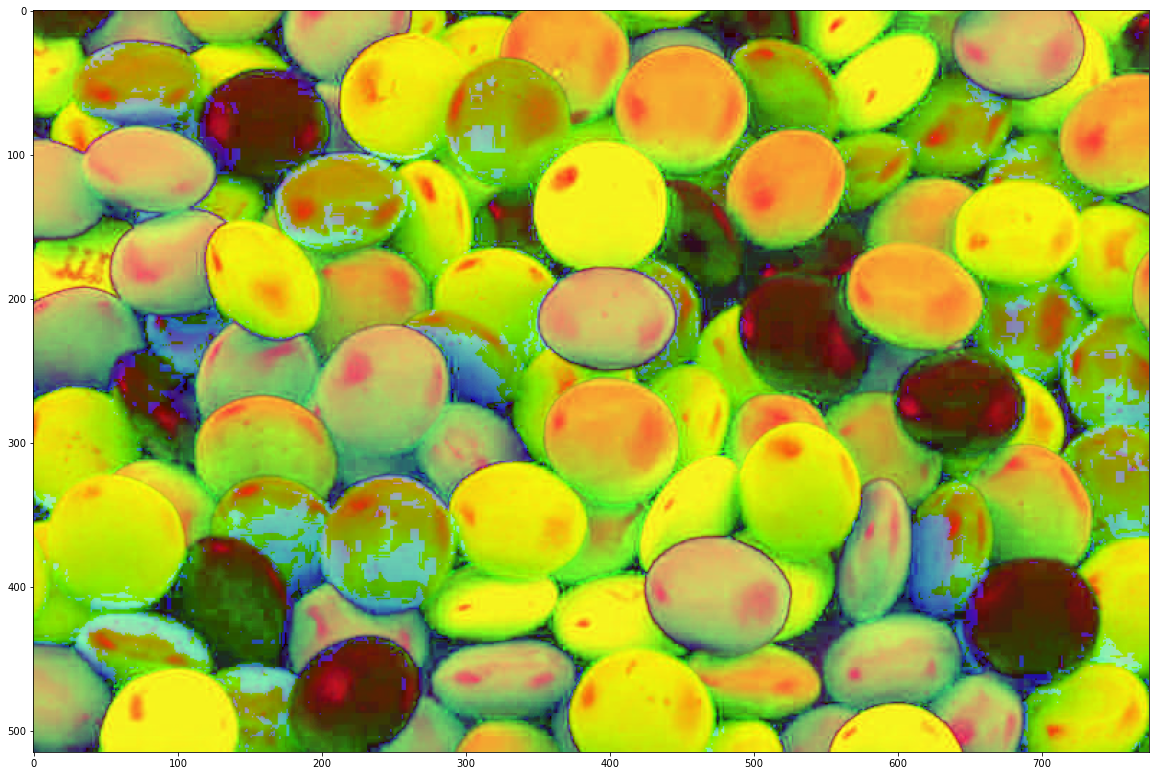

In [60]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
# cv2.add - to add two mask together
hsv_copy3 = hsv.copy()
lower = (25, 52, 72)
upper = (180, 255, 255)

plt.figure(figsize=(20, 15))
plt.imshow(hsv_copy3[:,:,::-1])

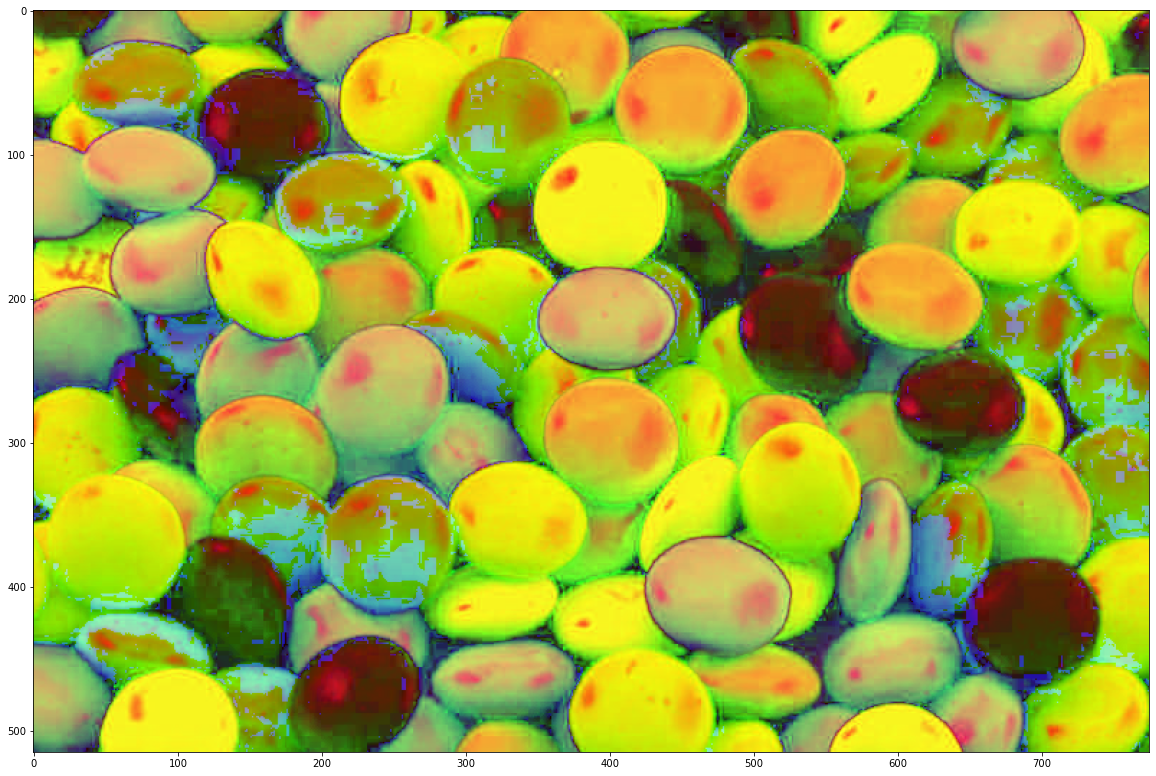

In [62]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image
opacity = 0.8
hsv_copy4 = cv2.addWeighted(hsv_copy, opacity, hsv_copy2, 1- opacity, 1)
plt.figure(figsize=(20, 15))
plt.imshow(hsv_copy4[:,:,::-1])






# opacity = 0.8
# img_copy6 = img.copy()
# rect = cv2.rectangle(img_copy6,(50, 50),(700,700),(0,0,0), -1)
# cv2.addWeighted(img_copy6, opacity, rect, 1- opacity, 1)
# cv2.putText(img_copy6,'Hello', (200, 200), 1, 3, (0, 255, 0), 3, cv2.LINE_AA)
# plt.figure(figsize=(20, 15))
# plt.imshow(img_copy6[:,:,::-1])


[Hint](# "cv2.addWeighted") 

In [63]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?